In [81]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt

# 神經網路方面
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

In [82]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [83]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [84]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X.reshape(28,28), cmap = 'Greys')
    print(f'本資料 y 給定的答案為: {y_train[n]}')

In [85]:
interact_manual(show_xy, n=(0,59999));

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

In [86]:
n = 100
X = x_train[n]

In [87]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [88]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [89]:
x_train = x_train/255
x_test = x_test/255

In [90]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [91]:
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

In [105]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #第一步拉平

In [106]:
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(lr=1), metrics=['accuracy'])

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_33 (Dense)             (None, 300)               30300     
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 139,910
Trainable params: 139,910
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.0296 - acc: 0.7961
Epoch 2/15
60000/60000 [==============================] - 2s 40us/step - loss: 0.0112 - acc: 0.9278
Epoch 3/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.0088 - acc: 0.9437
Epoch 4/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.0073 - acc: 0.9532
Epoch 5/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062 - acc: 0.9611
Epoch 6/15
60000/60000 [==============================] - 2s 41us/step - loss: 0.0055 - acc: 0.9658
Epoch 7/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.0048 - acc: 0.9700
Epoch 8/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.0044 - acc: 0.9730
Epoch 9/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.0039 - acc: 0.9761
Epoch 10/15
60000/60000 [==============================] - 3s 46us/step - loss: 0.0036 - acc: 0.9786

In [110]:
from ipywidgets import interact_manual
predict = model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

神經網路判斷為: 9


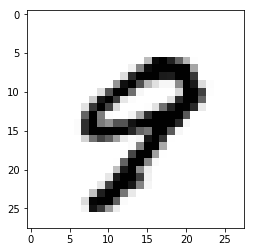

In [111]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

test(9250)

In [112]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [113]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 59us/step


In [114]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.004087958554935232
正確率 0.9732


In [115]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')